## Exercise: Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) 
Perform a similar alanlaysis as above on this dataset with the following sections:
High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
Explain our objective.
Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"./haberman.csv", names=['age', 'year_of_operation', 'axillary_nodes', 'survival_status'])

Attribute Information:

Age of patient at time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [3]:
df.shape

(306, 4)

In [4]:
df.head(5)

,age,year_of_operation,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df['year_of_operation'].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year_of_operation, dtype: int64

In [6]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

In [7]:
df.tail()

,age,year_of_operation,axillary_nodes,survival_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


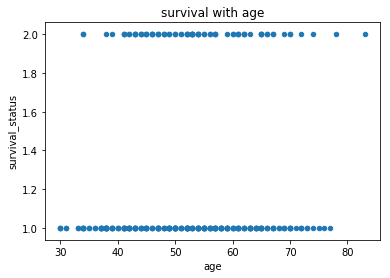

In [8]:
df.plot(kind='scatter', x='age', y='survival_status')
plt.title('survival with age')
plt.show()

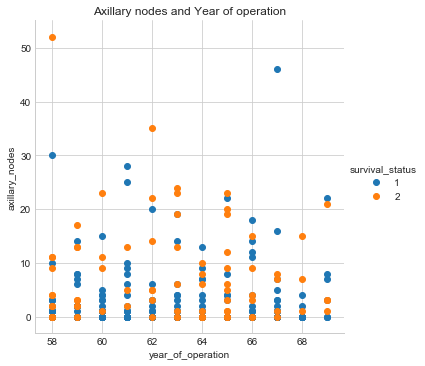

In [9]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='survival_status', size=5) \
   .map(plt.scatter, 'year_of_operation', 'axillary_nodes') \
   .add_legend()
plt.title('Axillary nodes and Year of operation')
plt.show()

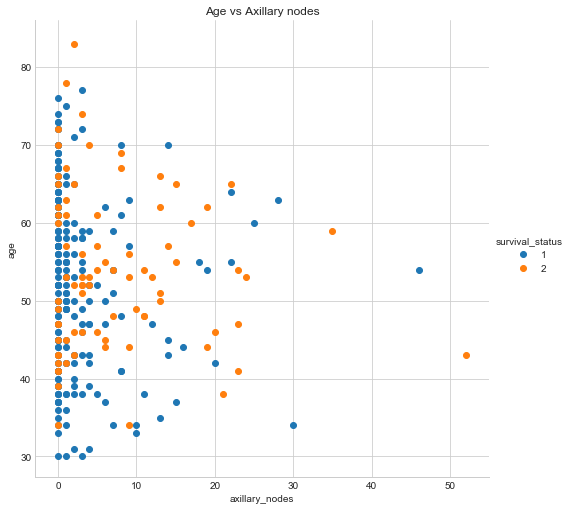

In [10]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='survival_status', size=7) \
   .map(plt.scatter, 'axillary_nodes', 'age') \
   .add_legend()
plt.title('Age vs Axillary nodes')
plt.show()


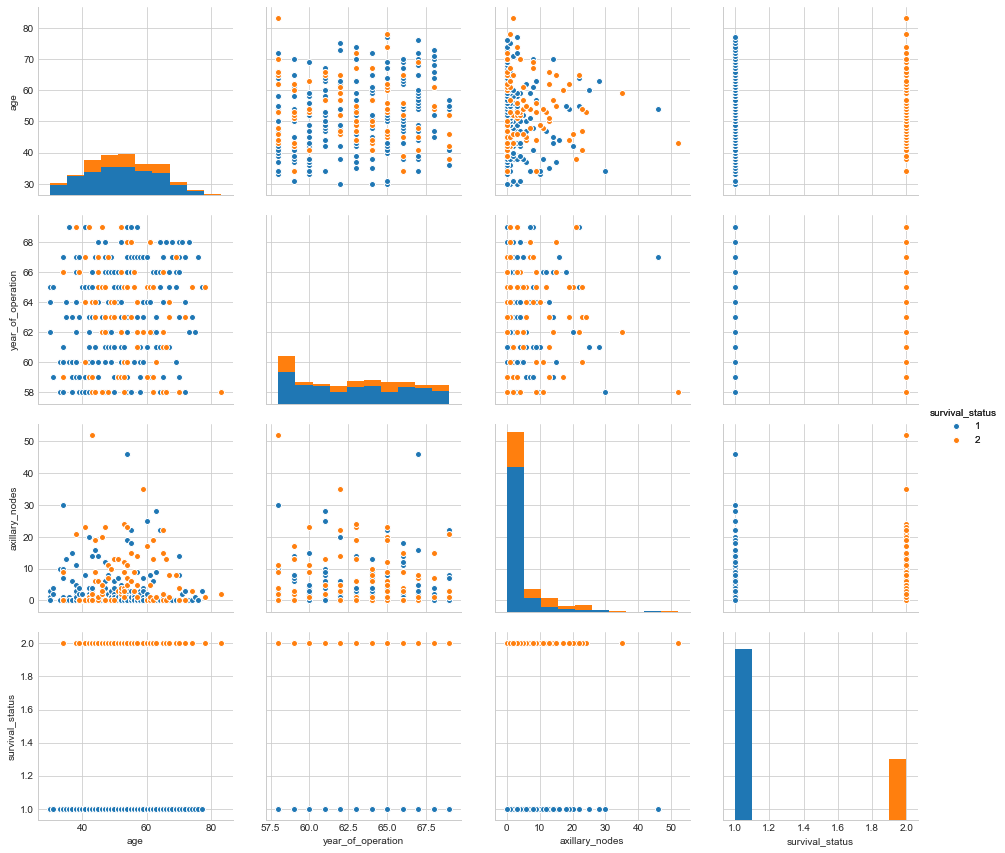

In [11]:
plt.close();
sns.set_style('whitegrid')
sns.pairplot(df, hue='survival_status', size=3) \
   .add_legend()
plt.show()

### Looking at the pair plots, Nothing much could be concluded about the data, which can help in classifying the data

In [12]:
survived=df[df['survival_status']==1]
not_survived=df[df['survival_status']==2]

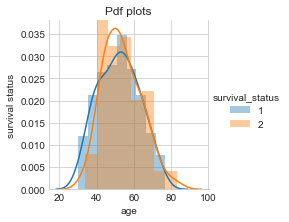

In [13]:
sns.FacetGrid(df, hue='survival_status') \
   .map(sns.distplot, 'age') \
   .add_legend()
plt.xlabel("age")
plt.ylabel("survival status")
plt.title('Pdf plots')
plt.show()

## PDF for Survival status is very much over-lapped.
## Therefore age alone can not help in distinguishing the survival status.

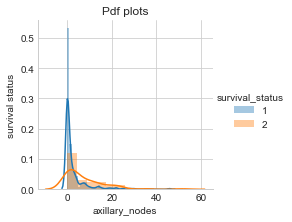

In [14]:
sns.FacetGrid(df, hue='survival_status') \
   .map(sns.distplot, 'axillary_nodes') \
   .add_legend()
plt.xlabel("axillary_nodes")
plt.ylabel("survival status")
plt.title('Pdf plots')
plt.show()

## PDF for Survival status is very much over-lapped.
## Therefore, axillary nodes alone can not help in distinguishing the survival status.
## Though, this can be concluded that no. of axillary nodes serve a better purpose as compared to age of the patient.

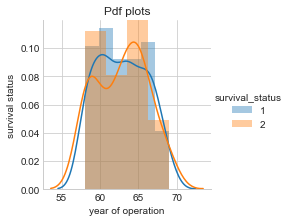

In [15]:
sns.FacetGrid(df, hue='survival_status') \
   .map(sns.distplot, 'year_of_operation') \
   .add_legend()
plt.xlabel("year of operation")
plt.ylabel("survival status")
plt.title('Pdf plots')
plt.show()

## PDF for Survival status is very much over-lapped.
## Therefore, year of operation can not help in distinguishing the survival status.

[0.01134752 0.02269504 0.02647754 0.01985816 0.03498818 0.03498818
 0.01985816 0.02364066 0.01323877 0.00567376]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]


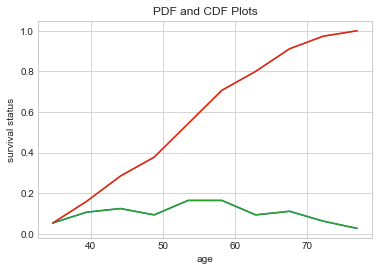

In [16]:
count, bin_edges=np.histogram(survived['age'], bins=10, density=True)
pdf=count/sum(count)
print(count)
print(bin_edges)
print(pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf);
np.histogram(survived['age'], bins=20, density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age")
plt.ylabel("survival status")
plt.title('PDF and CDF Plots')
plt.show()

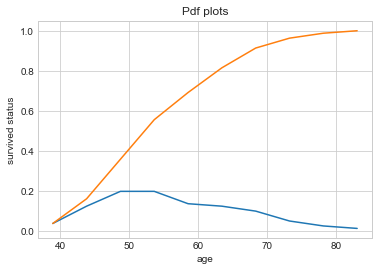

In [17]:
#survived
count, bin_edges=np.histogram(not_survived['age'], bins=10, density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age")
plt.ylabel("survived status")
plt.title('Pdf plots')

plt.show()

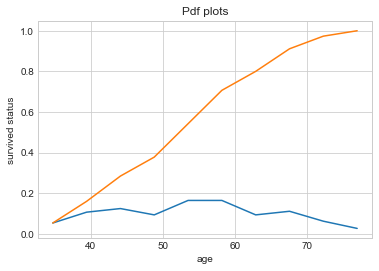

In [18]:
#not_survive
count, bin_edges=np.histogram(survived['age'], bins=10, density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age")
plt.ylabel("survived status")
plt.title('Pdf plots')

plt.show()

Text(0.5,1,'PDF and CDF plots')

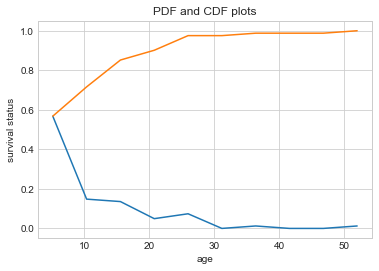

In [19]:
#survived
count, bin_edges=np.histogram(not_survived['axillary_nodes'], bins=10, density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age")
plt.ylabel("survival status")
plt.title('PDF and CDF plots')

Text(0.5,1,'PDF and CDF plots')

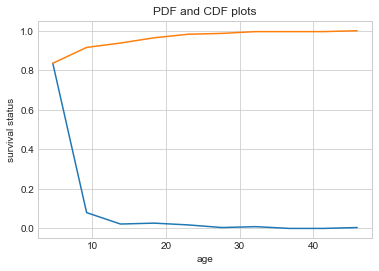

In [20]:
#not_survive
count, bin_edges=np.histogram(survived['axillary_nodes'], bins=10, density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("age")
plt.ylabel("survival status")
plt.title('PDF and CDF plots')

Text(0.5,1,'PDF and CDF plots')

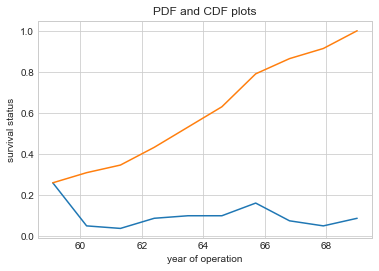

In [21]:
#survived
count, bin_edges=np.histogram(not_survived['year_of_operation'], bins=10, density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("year of operation")
plt.ylabel("survival status")
plt.title('PDF and CDF plots')


Text(0.5,1,'PDF and CDF plots')

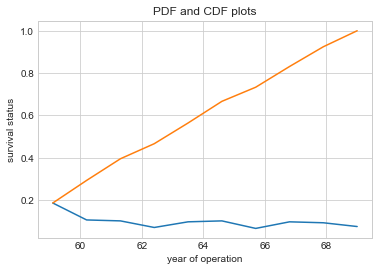

In [22]:
#not_survive
count, bin_edges=np.histogram(survived['year_of_operation'], bins=10, density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("year of operation")
plt.ylabel("survival status")
plt.title('PDF and CDF plots')

In [23]:
#Mean, & Std Dev
print("Mean age Survived : ", np.mean(survived['age']))
print("Mean age Not_survived : ",np.mean(not_survived['age']))

print("Mean axillary_nodes Survived : ", np.mean(survived['axillary_nodes']))
print("Mean axillary_nodes Not_survived : ",np.mean(not_survived['axillary_nodes']))


print("Mean year-of-operation Survived : ", np.mean(survived['year_of_operation']))
print("Mean year-of-operation Not_survived : ",np.mean(not_survived['year_of_operation']))


Mean age Survived :  52.01777777777778
Mean age Not_survived :  53.67901234567901
Mean axillary_nodes Survived :  2.7911111111111113
Mean axillary_nodes Not_survived :  7.45679012345679
Mean year-of-operation Survived :  62.86222222222222
Mean year-of-operation Not_survived :  62.82716049382716


### It can be seen that mean of the people who survived has ~ 3 nodes and patients who couldn't survive had ~ 7 nodes.

In [24]:
#Median
print(np.median(survived['age']))
print(np.median(survived['year_of_operation']))
print(np.median(survived['axillary_nodes']))
print(np.median(not_survived['age']))
print(np.median(not_survived['year_of_operation']))
print(np.median(not_survived['axillary_nodes']))

52.0
63.0
0.0
53.0
63.0
4.0


In [25]:
# Median Absolute Deviation
from statsmodels import robust
print(robust.mad(survived["age"]))
print(robust.mad(survived["year_of_operation"]))
print(robust.mad(survived["axillary_nodes"]))
print(robust.mad(not_survived["age"]))
print(robust.mad(not_survived["year_of_operation"]))
print(robust.mad(not_survived["axillary_nodes"]))


13.343419966550417
4.447806655516806
0.0
11.860817748044816
4.447806655516806
5.930408874022408


### It can be seen that most people with no nodes survived and patients with 4 nodes couldn't survive

In [26]:
# Standard Deviation
print(np.std(survived['age']))
print(np.std(survived['year_of_operation']))
print(np.std(survived['axillary_nodes']))
print(np.std(not_survived['age']))
print(np.std(not_survived['year_of_operation']))
print(np.std(not_survived['axillary_nodes']))

10.98765547510051
3.2157452144021956
5.857258449412131
10.10418219303131
3.3214236255207883
9.128776076761632


In [27]:
# 0th, 25th, 50th, and 75th
print(np.percentile(survived['age'], np.arange(0,100,25)))
print(np.percentile(survived['year_of_operation'], np.arange(0,100,25)))
print(np.percentile(survived['axillary_nodes'], np.arange(0,100,25)))
print(np.percentile(not_survived['age'], np.arange(0,100,25)))
print(np.percentile(not_survived['year_of_operation'], np.arange(0,100,25)))
print(np.percentile(not_survived['axillary_nodes'], np.arange(0,100,25)))


[30. 43. 52. 60.]
[58. 60. 63. 66.]
[0. 0. 0. 3.]
[34. 46. 53. 61.]
[58. 59. 63. 65.]
[ 0.  1.  4. 11.]


In [28]:
# 90th percentiles
print(np.percentile(survived['age'],90))
print(np.percentile(survived['year_of_operation'], 90))
print(np.percentile(survived['axillary_nodes'], 90))
print(np.percentile(not_survived['age'], 90))
print(np.percentile(not_survived['year_of_operation'], 90))
print(np.percentile(not_survived['axillary_nodes'], 90))

67.0
67.0
8.0
67.0
67.0
20.0


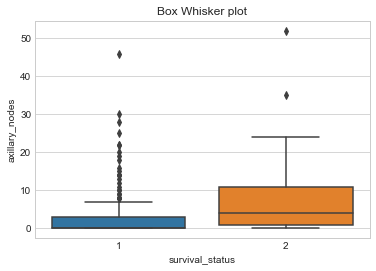

In [29]:
sns.boxplot(x='survival_status',y='axillary_nodes', data=df)
plt.title('Box Whisker plot')   
plt.show()

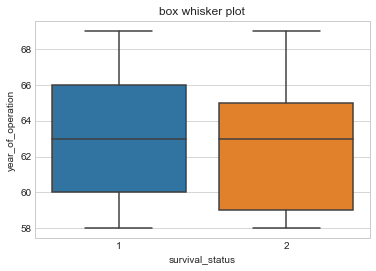

In [30]:
sns.boxplot(x='survival_status',y='year_of_operation', data=df)
plt.title('box whisker plot')
plt.show()

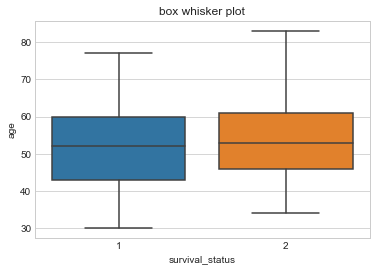

In [31]:
sns.boxplot(x='survival_status',y='age', data=df)
plt.title('box whisker plot')
plt.show()


### There is no requirement of both Violin and Box Whisker plots here, but this is only for the sake of using these tools.

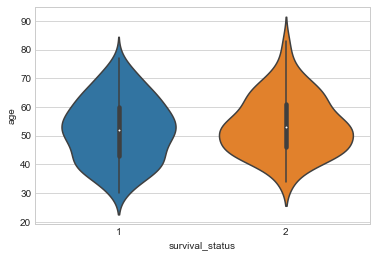

In [32]:
sns.violinplot(x='survival_status',y='age', data=df)
plt.show()

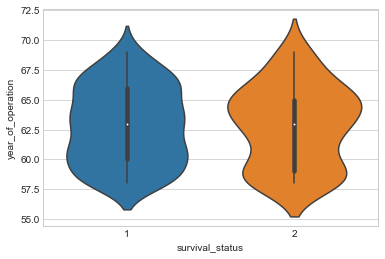

In [33]:
sns.violinplot(x='survival_status',y='year_of_operation', data=df)
plt.show()

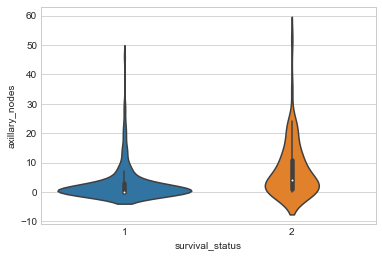

In [34]:
sns.violinplot(x='survival_status',y='axillary_nodes', data=df)
plt.show()

## Overall observations
### 1. Nothing much could be done regarding the fact that no particular parameter has out-standed in classifying the survival status
### 2. Though people with lesser no of nodes have more chances of survival
### 3. Both the mean and median help in concluding that patients with lesser number of nodes have some edge over the other two parameters in deciding the survival status of the patients 